<a/ id='top'></a>
# Homework 3: Random Variables and Their Distributions
***

**Name**: Frank Harvey

***

This assignment is due on Moodle by **5pm on Friday October 12**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1

Suppose you are modeling the probability of observing flood levels of various heights when there is a storm in a particular coastal city.  Let $X$ be a random variable representing the observed flood height (in feet), which must be nonnegative. There are many different choices for probability density function (pdf) for $X$.  You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{10}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

We need to find $c$ by integrating the function $f(x) = c \ x \ e^{\left(-\frac{x^2}{10}\right)}$

$$\int_{0}^{\infty} x \ e^{\left(-\frac{x^2}{10}\right)}dx = 1$$
$$[({-5e}^{\left(-\frac{\infty^2}{10}\right)}) - ({-5e}^{\left(-\frac{0^2}{10}\right)})] = 5$$
$$c \ast 5 = 1$$
$$c = \frac{1}{5}$$

**Part B**: Compute the cumulative density (cdf) function $F(x)$ for $X$.  Then, conduct two sanity checks: First, what should $F(0)$ equal?  Second, what should be the limit of $F(x)$ as $x \rightarrow \infty$?  Be sure to **justify** these answers. Verify that $F(0)$ and $\displaystyle \lim_{x\rightarrow \infty} F(x)$ satisfy your hypotheses using cdf you derived.

We would expect $F(0)$ to be $0$, since our original function starts at $0$. The limit of $F(x)$ as $x \rightarrow \infty$ should be $1$ as our entire PDF exists from $0$ to $\infty$. We can compute our CDF like this:

$$F(x) = \int_{0}^{x}f(x)dx$$
$$F(x) = c \int_{0}^{\infty} x \ e^{\left(-\frac{x^2}{10}\right)}dx$$
$$1 = c ({-5e}^{\left(-\frac{x^2}{10}\right)})\Big|_0^\infty$$

which does satisfy my hypothesis.

**Part C:**  Use the cdf you derived in **Part B** to calculate the median, $\tilde{x}$, of the probability density for $X$.

The CDF can be used to find the median because the CDF will equal 1/2 at the point where x is the median: $\tilde{x}$. So we can say:
$$F(\tilde{x}) = \frac{1}{2}$$
$$\frac{1}{2} = c \int_{0}^{\tilde{x}} x \ e^{\left(-\frac{x^2}{10}\right)}dx$$
which according to Wolfram Alpha is $\sqrt{\ln{1024}}$.x

**Part D**: It is a well-known fact that if there is a storm in your coastal city, if the flood level exceeds 6 feet, then the town will become inundated with octopuses in an event known localy as **Octogeddon**. Use the cdf you computed in **Part B** to find the probability that a given storm is an Octogeddon. 

$$P(X\geq6) = \int_{6}^{\infty}f(x)dx$$
$$P(X\geq6) = c \int_{6}^{\infty} x \ e^{\left(-\frac{x^2}{10}\right)}dx$$
$$P(X\geq6) = c({-5e}^{\left(-\frac{x^2}{10}\right)})\Big|_6^\infty$$
$$P(X\geq6) = c \frac{5}{e^\frac{18}{5}}$$
$$P(X\geq6) = 0.02732$$

**Part E:** You have been painstakingly collecting data on storms in your city, and have determined that storms occur at an average rate of 5 per year. To makes things a bit more precise, the pdf from **Part A** really describes the distribution of flood heights *given* that there is a storm, $P(X \mid \text{storm})$. You may assume that storms occur as independent events of one another.

What is the probability of observing 3 storms in a given year, none of which are Octogeddons?

That is, what is $P(3 \text{ non-Octogeddon storms} \cap 3 \text{ storms})$?

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [20 points] Problem 2

You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  From your Intro to Data Science class you remember that the distribution of times _between_ independent arrivals is often modeled using an Exponential distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-customer times do in fact follow exponential distributions, what distributions do you expect the **number** of customers who pass through each line in a given 10-minute interval to follow?  What are the parameter(s) of each distribution?  Note that you should consider both the case where the self check-out is working properly and when it is broken.

###### John's Line
$$\lambda = 4$$
$$P(X=k) = \frac{\lambda^k}{k!}e^{-\lambda}$$

###### Machine's Line
$$\lambda_{w} = 5 \text{ for working machines}$$ 
$$\lambda_{f} = 1 \text{ for frozen machines}$$ 
$$P(X=k) = .9\ast\frac{\lambda_{w}^k}{k!}e^{-\lambda_{w}} + .9\ast\frac{\lambda_{f}^k}{k!}e^{-\lambda_{f}}$$

**Part B**:  What is the probability that 6 customers pass through John's line in the next 10 minutes?  What about the self check-out, assuming that it is working?  What about the self check-out, assuming that it is frozen?

In [181]:
from math import exp

def factorial(n):
    fact = 1
    for i in range(1,n+1): 
        fact = fact * i
    return fact

def machineCheckOut(k, lamb):
    return (((lamb**k)/factorial(k))*(math.exp(-lamb)))

johnsLineSix = machineCheckOut(6, 4)
selfCheckOutWork = machineCheckOut(6, 5)
selfCheckOutFroze = machineCheckOut(6, 1)
print("John: %s\nSelf (working): %s\nSelf (frozen): %s" % (johnsLineSix,selfCheckOutWork,selfCheckOutFroze))

John: 0.1041956345670211
Self (working): 0.1462228081398756
Self (frozen): 0.0005109436682936699


So there's roughly a 10% probability that John's line can get through 6 people in 10 minutes, a nearly 15% probability that a working self checkout line can get through 6, and .05% probability of a frozen self checkout line getting through 6 people in 10 minutes.

**Part C:**  Use your answer to **Part B** and the Law of Total Probability to calculate the probability that the self check-out tends 6 customers is the next 10 minutes.

Basically the law of total probability allows us to calculate the probability of something knowing the probability of _whether or not_ the event it depends on happens. The LTP states $P(A) = P(A|B)P(B)+P(A|B^{c})P(B^{c})$. In this example $A$ is the event that the self checkout line gets through 6 people, and $B$ is the event that the self checkout machine is working (and $B^{c}$ is a frozen machine).

In [182]:
LTPSelfCheckOut = machineCheckOut(6, 5)*.9 + machineCheckOut(6,1)*.1
print(LTPSelfCheckOut)

0.1316516216927174


So there's a roughly 13% probablity of the self checkout line processing 6 people in 10 minutes.

**Part D**:  S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  Calculate **exactly** (aside from rounding) the probability that he serves 100 or more customers during his shift.  (Assume we can safely scale our data up to a 5-hour interval.)

100 customers is 20 an hour, or 2 every 10 minutes, so we expect the probability to be quite high that he can get 100 processed in 5 hours. The CDF for a Poisson can be calculated like this: $\sum_{i=1}^{k} \frac{e^{-\lambda}\lambda^{i}}{i!}$

In [183]:
def PoissonCDF(k,lamb):
    sum = 0
    for i in range(1,k+1):
        sum += ((math.exp(-lamb))*(lamb**i))/factorial(i)
    return sum

JohnHitsHundos = PoissonCDF(100, 4)
print(JohnHitsHundos)

0.9816843611112656


According to my python code he has a roughly 98% probability of processing 100 people in 5 hours. This is what I expected.

**Part E**:  Write a function `checkout_count` to simulate the number of customers served by the self check-out machine in a 5-hour shift. At the very least, your function should take as input the working and broken customer arrival rate parameters, and the probability that the machine is working properly. Your simulation should model the arrival of each new customer, and sample whether or not the machine is working properly for each new customer. Then, your function should simulate customer arrival times at the front of the line by sampling between-customer times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function, where the argument $\lambda$ will depend on the state of the machine (working or broken). Your function should return the number of customer arrivals in a 5-hour shift. Use at least 5000 simulations.

Use this function to estimate the probability of the self check-out machine serves 100 or more customers in a 5-hour shift, and report your result.

Finally, use **this same function**, to verify your answer to **Part D**.

**Caution!**  Be aware that in some Numpy or Scipy functions for distribution and/or random variables, the conventions for the parameter arguments may differ from those used in class.

In [184]:
def checkout_count(rate_work, rate_broken, p, trials=5000, time_len=300):
#     every minute
    workState = np.random.binomial(1, p, size=(trials,time_len)) # 1's and 0's representing working/not working
    # array of rates depending on whether machine is working, by time
    ratesState = (rate_work*workState + rate_broken*np.logical_not(workState))
    arrivalTimes = np.random.exponential(1/ratesState, size=(trials,time_len)) # in minutes, time between customer arrival
    return np.cumsum((np.cumsum(arrivalTimes,axis=1)<time_len),axis=1)[:,-1] #filters out times after time_len, and then sums number of customers

selfCheckCount = checkout_count(.5, .1, .9)
johnCount = checkout_count(.4, .4, 1)
print("Mean after 5000 trials\nSelf Checkout: %s\nJohn Checkout: %s" % (np.mean(selfCheckCount),np.mean(johnCount)))

Mean after 5000 trials
Self Checkout: 108.0198
John Checkout: 119.995


**Part F:** Comment on the results you found in **Part E** for the probabilities that John and the self check-out machine will serve 100 or more customers in a 5-hour block. Which seems like a better investment for the grocery store?

I'm not sure I can comment on which is a better investment, as the cost of self checkout machine might be lower than the wages of a checkout clerk, but John does seem to have a higher rate on average, due to the breakdown rate of the self checkout machine. If you can get the breakdown rate down to .1% the machine gets an average of over 140 customers in 5 hours, so potentially the real quality investment lies in QA.

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [292]:
def pmf_natural(x):
    return math.log10((x+1)/x)

def check_pmf_natural():
    acc = 0
    for i in range(1,10):
        acc+=pmf_natural(i)
    assert int(acc) == 1, "Something has gone horribly wrong"
    return acc

for val in range(1,10):
    print (val, pmf_natural(val))
print ("Total", check_pmf_natural())

1 0.3010299956639812
2 0.17609125905568124
3 0.12493873660829993
4 0.09691001300805642
5 0.07918124604762482
6 0.06694678963061322
7 0.05799194697768673
8 0.05115252244738129
9 0.04575749056067514
Total 1.0


**Part B**: Use the function you wrote above to make two bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. Please make one plot directly above the other. 

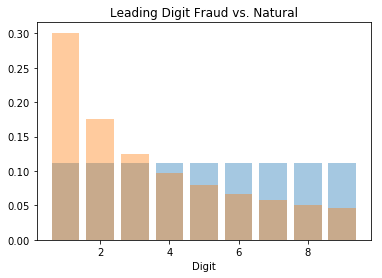

In [320]:
fraud_list = [1/9] * 9
pmf_natural_list = [0] * 9

for i,j in enumerate(range(1,10)):
    pmf_natural_list[i] = pmf_natural(j)
    
fig1,ax1 = plt.subplots(1,1)
plt.bar(range(1,10),fraud_list,
        alpha=.4,
        label="Frauds")
plt.bar(range(1,10),pmf_natural_list,
        alpha=.4,
        label="PMF Natural")
plt.title("Leading Digit Fraud vs. Natural")
plt.xlabel("Digit")
ax.set_ylabel("Probability")

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [324]:
def cdf_natural(y):
    acc = 0
    for i in range(1,y+1):
        acc += pmf_natural(i)
    return acc

print("The leading digit is at most 4 with probability: %s" % cdf_natural(4))
print("The leading digit is at most 5 with probability: %s" % cdf_natural(5))

The leading digit is at most 4 with probability: 0.6989700043360189
The leading digit is at most 5 with probability: 0.7781512503836436


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

[49430, 32276, 18629, 13499, 10892, 7862, 6198, 5934, 6040]


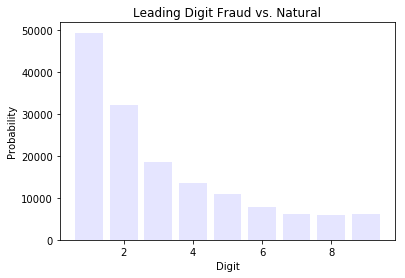

In [381]:
df = pd.read_csv("tax_data.txt",sep='\t',header=0)
# reference TK
ld = df["Tax Incomes"].dropna().astype(str).str[0].astype(int)
tax_data = ld.value_counts()

fraud_list = [1/9] * 9
pmf_natural_list = [0] * 9

for i,j in enumerate(range(1,10)):
    pmf_natural_list[i] = pmf_natural(j)

tax_data_rev = [0] * 9
for i in range(1,10):
    tax_data_rev[i-1] = tax_data[i]
print(tax_data_rev)

fig,ax = plt.subplots(1,1)
plt.bar(range(1,10),tax_data_rev,
        alpha=.1,
        color = "blue",
        label="Actual Data")
plt.bar(range(1,10),fraud_list,
        alpha=.4,
        color = "green",
        label="Frauds")
plt.bar(range(1,10),pmf_natural_list,
        alpha=.4,
        color = "orange",
        label="PMF Natural")
plt.title("Leading Digit Fraud vs. Natural")
plt.xlabel("Digit")
ax.set_ylabel("Probability")

You can basically see that the lower numbers are slighlty inflated compared to the highers, which is an effect some small amount of fraud effecting all numbers equally.

### [20 points] Problem 4
***

Well. They're back at it. Tony and Dan are honing their lightsaber skills, and this time they've got a _new_ tournament format. (They wouldn't have had to switch formats, but you figured out all the probabilities for their previous tournament format two weeks ago, so this is on you.)

The new format is a _Best-of-9 Series_ of individual duels. The first professor to win 5 duels is declared the winner. Each duel can be considered to be independent of all previous duels. Moreover, a rigorous statistical analysis of Tony's and Dan's strengths, weaknesses, and handwriting, has revealed that Tony has an edge: the probability that Tony wins any one duel against Dan is given by $p=0.56$.

**Part A**: What is the probability that Tony wins the 9-duel series on the 8th duel? 

**Part B**: What is the probability that Tony wins the 9-duel series in _any_ valid number of duels? 

**Part C**: The winner of the tournament will take home \$10,000 to use for a giant home aquarium for Stella the Octopus. Because the stakes are so high, Tony has decided to hire a famous Jedi consultant, Darth Ketelsen, to help him prepare for each duel. 

With Ketelsen's help, Tony's probability of winning any given match increases to $p = 0.7$. Ketelsen charges a fee of \$90 per game, but as a testament to her confidence in her abilities, only charges Tony the \$90 for games that he wins and _only if Tony wins the whole tournament_.  So, if Tony competes in a 9-duel tournament and wins, he will take home \$10,000 _minus_ \$450 for Darth Ketelsen's fees, for a total payout of \$9,550.  What is the expected payout for a 9-duel series?   

**Part D**: This year the Jedi Knight Lightsaber-on-Lightsaber Association (the JKLOL Assoc) is implementing an experimental rule: Since Tony is rumored to be the stronger duelist, he gets to _choose_ the length of the championship tournament! Specifically, he can choose the series to be any odd length, from $N=3, 5, 7 \dots, 99$ duels long. Assuming that Tony continues to use the service of Darth Ketelsen, and considering the fact that Tony has a better-than-even chance of winning each duel, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 

**Part E**: Write a function `optimal_series` that takes in $p$, the probability that Tony wins an individual duel, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [8]:
def optimal_series(p):
    # something
    optimal_series_length = 1
    return optimal_series_length

### [20 points] Problem 5

Cement your superior stochastic simulation skills by solving some straightforward simulation scenarios.

**Part A**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, two cards are sequentially chosen which have either identical value or _adjacent_ value. You may let Aces be high or low, but not both.

In [382]:
# Reference https://stackoverflow.com/questions/41970795/what-is-the-best-way-to-create-a-deck-of-cards
# and this for shufflinghttps://stackoverflow.com/questions/10048069/what-is-the-most-pythonic-way-to-pop-a-random-element-from-a-list
import random

class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit

def simCardAdj(trials):
    suits = ['heart', 'diamonds', 'spades', 'clubs']
    found = 0
    for i in range(trials):
        deck = [Card(value, suit) for value in range(1, 14) for suit in suits]
        random.shuffle(deck)
        card1 = deck.pop()
        card2 = deck.pop()
        if abs(card1.value - card2.value) < 2:
            found += 1
        del deck
    return found/trials

print("The probability of finding two adjacent-value cards after 2 draws: %s percent" % (simCardAdj(10000)*100))

The probability of finding two adjacent-value cards after 2 draws: 21.029999999999998 percent


**Part B**: Using a stochastic simulation, compute the probability that, from a shuffled standard deck of cards, three cards are sequentially chosen which form a run, e.g. 4-5-6 or 9-10-J. (The cards do not need to be drawn in order, like 4,5,6... any order is fine, like 6,4,5.) You may let Aces be high or low, but not both.

In [383]:
import statistics as st

class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit

def simCardThreeRun(trials):
    suits = ['heart', 'diamonds', 'spades', 'clubs']
    found = 0
    for i in range(trials):
        deck = [Card(value, suit) for value in range(1, 14) for suit in suits]
        random.shuffle(deck)
        card1 = deck.pop()
        card2 = deck.pop()
        card3 = deck.pop()
        cards = [card1.value, card2.value, card3.value]
        if (min(cards) == max(cards)-2) and (st.median(cards) == min(cards)) + 1 and (st.median(cards) == max(cards) - 1):
            found += 1
            del cards
            del deck
    return found/trials

print("The probability of finding a run of three value adjacent cards: %s percent" % (simCardThreeRun(10000)*100))

The probability of finding a run of three value adjacent cards: 3.0300000000000002 percent


**Part C**: When flipping over cards, sequentially, from a randomly shuffled deck, what is the probability that the third Ace will be revealed between flips 16 and 24, inclusively?

In [384]:
class Card:
    def __init__(self, value, suit):
        self.value = value
        self.suit = suit

def simCardFlipAce(trials):
    suits = ['heart', 'diamonds', 'spades', 'clubs']
    found = 0
    for trial in range(trials):
        deck = [Card(value, suit) for value in range(1, 14) for suit in suits]
        random.shuffle(deck)
        aces = 0
        for i,card in enumerate(deck):
            if card.value==1:
                aces += 1
            if i<=24 and i>=16 and card.value==1 and aces==3:
                found+=1
                break
        del deck
    return found/trials

print("The probability of finding the third ace between draws 16 and 24: %s percent" % (simCardFlipAce(10000)*100))

The probability of finding the third ace between draws 16 and 24: 19.54 percent


**Part D**: Using a stochastic simulation, determine the probability mass function for: the probability that the first card drawn is an $X$, given that the card was part of a 3-card sequence (as in Part B). Express your PMF as a bar graph. Explain why it has the shape that it has.